# Walkthrough
Let's pick a Dr. K figure and see if we can duplicate it.

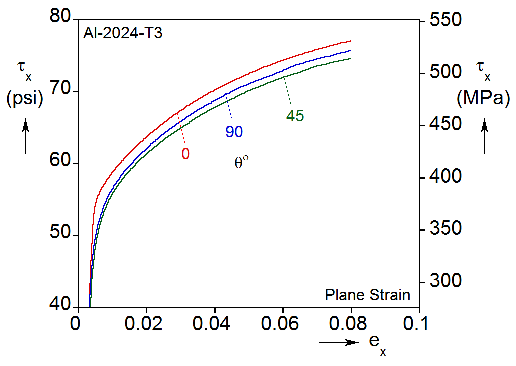

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import Image
Image(filename='TutorialDocs/Goal.png')

##### A few observations:
    (1) An axes linewidth that is surely greater than the MPL default
    (2) Ticks are out on all axis and not present on the top
    (3) Arial font for English characters, but Times New Roman font for Greek
    (4) These arrows on the axis labels
    (5) Rotated y-axis labels, with units below the quantity
    (6) Two *different* y-scales!
    (7) No legend, but colored connectors to each line with it's respective label
    (8) Text annotations within the axes

###### So let's see how close we can get.

# Preliminaries
###### Let me start by: 
     (1)Importing the modules I need
     (2)Loading up and preparing the data I need
     (3)Plotting the data using Matplotlib's defaults

In [2]:
%matplotlib inline
import matplotlib.pyplot as p
import numpy as n
from pandas import read_csv

In [3]:
data = read_csv('TutorialDocs/Data.csv').values
d0,d90,d45 = (data[:,[2*i,2*i+1]] for i in range(3))
d0 = d0[ d0[:,0]<=.08, :]
d45 = d45[ d45[:,0]<=.08, :]
d90 = d90[ d90[:,0]<=.08, :]

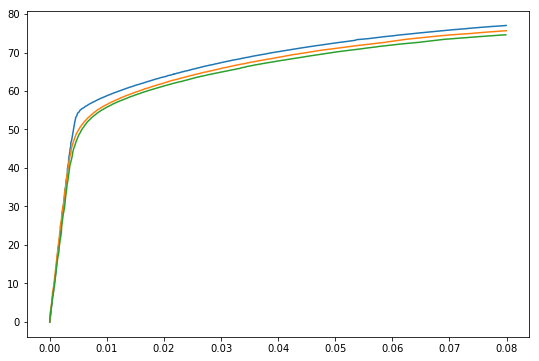

In [4]:
p.figure(figsize=(9,6))
p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1]);

##### Let's see what we can do

# `p.style.use('mysty')`
## The first thing we'll do is call a mpl stylesheet I made, `mysty`.
###### This will take care of observations (1), (2), and (3), except for turning off the ticks on top.
A critical setting from this stylesheet is setting `'mathtext.fontset : stix'`, and `'mathtext.default : rm'`.  `Stix` and `rm` were the only combination of settings that I found that gives the flexibility needed to satisfy observation (3), while also *consistently* working on various different MPL versions and installations (i.e., Windows and Ubuntu).
Note that the style sheet also calls `'font.sans-serif : Arial'`.  If Arial is unavailable, Liberation Sans is a good alternative common on Linux distributions (in fact this tutorial uses Liberaion Sans).

In [5]:
p.style.use('mysty')

Let's see how a plot looks doing this

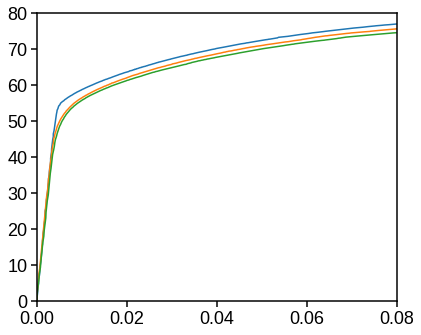

In [6]:
p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1]);

Certainly better than the MPL defaults.  But we need a little more help.  

The color cycle and linewidth I defined in `mysty` need adjustment *in this case* since I am rigorously trying to duplicate an existing figure.

In [7]:
from cycler import cycler
p.rcParams['axes.prop_cycle'] = cycler('color',['r','b','g'])
p.rcParams['lines.linewidth'] = 1

Witht that out of the way , let me introduce the biggest part of this package.

# `import figfun`

`figfun` contains the function `myax()` to which we'll pass our figure
for formatting.  It will take care of observations (4), (5), and (6).  It is fairly-well comented, so if you have a decent understanding of how MPL works you should understand what does what.

Within figun is a patch `MyArrow`, which is defined as a polygon subclass.  It is a hack of the matplotlib FancyArrow, which I discovered had some problems when saving as PDFs.  I also found its behavior to be strange and unintuitive...I'll get around to raising an issue on the MPL github page one of these days.  

Finally, there are some little functions in there to ease doing some common operations like putting text annotations in the corners (`eztext`), converting ksi to Mpa (`ksi2Mpa`), and transforming from data to axes (`data2axes`).  There's also an `ezlegend` function which I won't demonstrate in this tutorial, and three functions `make12, make21,` and `makequad` which generate figures with multiple axes.  
Run `[print(i) for i in dir(f)]` for a list of all functions defined within figfun.

`myax()` makes heavy use of `bounding boxes` to position things. Admittedly, I don't understand just what is so special about `bounding boxes`, why they require special handling, and why methods used to extract the info I need from them varies depending on what its parent object is (i.e. the axis frame, or the tick labels, or the axis labels).   Furthermore, their behaviour is *not* well described in the MPL documentation, IMO.  So a lot of this I figured out by working in Jupyter and using the `tab` completion to see what methods were available.

In [8]:
import figfun as f

All we need to do is plot our data, define the axis labels, then pass the axes to the function f.myax().  Be sure to define the labels ***before*** calling `myax().`  I'll also set our axis limits so that they're identical to the goal figure.

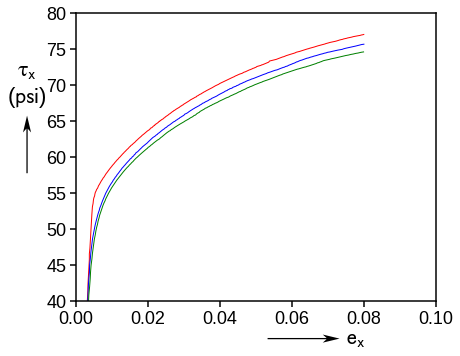

In [9]:
p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1])
p.axis([0,.1,40,80])
p.xlabel('$\\mathsf{e}_{\\mathsf{x}}$')
p.ylabel('$\\tau_{\\mathsf{x}}$\n($\\mathsf{psi}$)')
f.myax( p.gca() );

So with some careful use of mathtext on the axis labels, and one line of code in which we pass our axes through `myax()`, we get a figure back that is quite close to our goal.  Notice that, by default, the function removes the ticks on the right and top.

Let's do it again, but this time add the right axis label.  To do this we'll pass an axis-units conversion fucntion as the second argument to `myax()`.  Ksi-to-Mpa is need so often that I defined a conversion function within `figfun`. We'll also define the right axis label and pass that in as the third argument.

Again I'll have to specify the axis range, and I'll also specify the ticks.

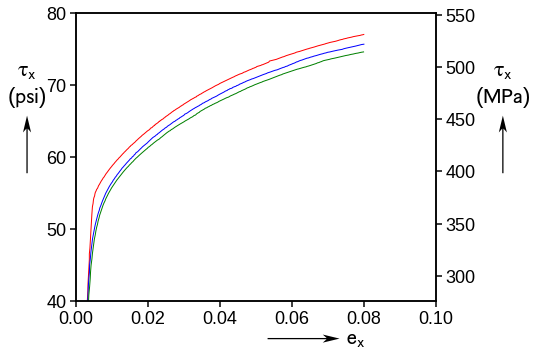

In [10]:
p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1])
p.axis([0,.1,40,80])
p.yticks([40,50,60,70,80])
p.xlabel('$\\mathsf{e}_{\\mathsf{x}}$')
p.ylabel('$\\tau_{\\mathsf{x}}$\n($\\mathsf{psi}$)')
rightaxlabel = '$\\tau_{\\mathsf{x}}$\n($\\mathsf{MPa}$)'
f.myax( p.gca(), f.ksi2Mpa, rightaxlabel );

#  We're in business!

Again,  with careful use of mathext and just passing our figure through `myax()` along with the right axis scale and label, we get 90% of the way there!

Before finishing up witht annotations, which unfortunately I cannot automate, let's talk a little more about `myax()`.

In [11]:
print(f.myax.__doc__)


    myax(fig_or_axes,
        conversion=None,rightaxlabel=None,
        autoscale=True,
        nudge=None,
        AL=.2,HL=.045,HW=.5,OH=.3,TW=.0035,PLW=0):
    Converts a figure with defined labels to K style.
    
    - Only required arg is axes hande or p.gca() (a figure handle is deprecated).
    -First two optional args are unit conversion function and the label if making a right axis
    -autoscale(=True):  If True, then the arrows are automatically scaled with the axes.
        If 'preserve', then the arrows are adjusted to be the exact same size as those on the standard 5x4 axes.
        If a float or int, then the aspect ratio is maintained but size adjusted.
        Both options hinge on the established defaults of HL=.045,HW=.5, and ,TW=.0035
        along with the mysty default axes size of 5x4.  So if these are ever messed with this could have issues.
        If False, then the defaults, or the values you input, are used.
    -nudge allows you to move the Y axis labels

###### You see that all possible arguments have a keyword, and most of them are parameters for the axis arrows (instances of `MyArrow`).  Here are some other important notes:
* If you pass a figure throuh `f.myax()` a second time, all instances of `MyArrow` on the figure will be removed and redrawn.  This is so that you can change the arrow properties if you want to without having to replot the figure every time.  However this gets messed up if a right axis scaled and label have already been drawn.  In this case, you need to manually remove the second axes before passing the figure back through. `myax`.
* I highly advise you set axis limits and ticks as you like prior to calling `myax()`.
* Arrow properties are specified in *axes coordinates*, which is why I made `autoscale` argument.

# Finishing up
Let's go ahead and add in all the little annotations and decorations.

* For the annotations in the corners, I'll call one of my helper functions `f.eztext()`, to which we pass the axes, the text, and the location ( the possible locations are one of the interior corners, and the function accepts a variety of names for these locations, such as `'upper left', 'ul', 'top left', 'tl'` are all acceptable for the top left corner where "Al-2024-T3" is going.
* Use `p.ginput()` to click for locations where you want your line/label connectors, and add them with `p.annotate()`.  Also, to help with the annotations, I'll get handles for the lines when I call `p.plot()`.
* This particular figure of Dr. K's had unusually short arrows.  The defaults you've seen up to now are more typical.  However, for purposes of duplcating this figure, I'll pass `AL=0.2*(2/3)` to `f.myax()` to shorten it from its default.

**Note I can't use `p.ginput()` with the inline backend, so I'll be loading up a file with the annotation locations stored in them.  Normally, though, if running from a script or using an interactive backend you can just click for whatever you need.

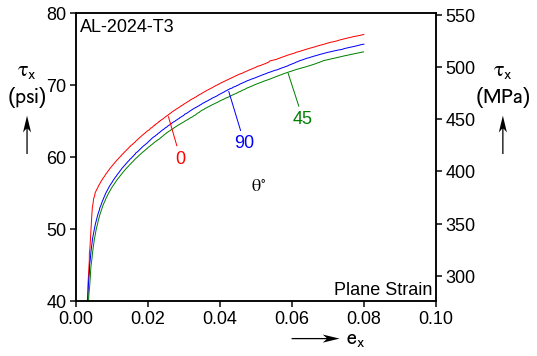

In [12]:
# Everything we did before:
L = p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1])
p.axis([0,.1,40,80])
p.yticks([40,50,60,70,80])
p.xlabel('$\\mathsf{e}_{\\mathsf{x}}$')
p.ylabel('$\\tau_{\\mathsf{x}}$\n($\\mathsf{psi}$)')
rightaxlabel = '$\\tau_{\\mathsf{x}}$\n($\\mathsf{MPa}$)'
locs = read_csv('TutorialDocs/Locs.dat',header=None).values

# Now some new stuff:
f.eztext( p.gca(), 'AL-2024-T3', 'ul')  # Is the same as...
#p.text(.02,.98,'AL-2024-T3',transform=p.gca().transAxes,ha='left',va='top')
f.eztext( p.gca(), 'Plane Strain', 'br') #Is the same as...
#p.text(.98,.02,'Plane Strain',transform=p.gca().transAxes,ha='right',va='bottom')

labels = ['0','90','45']
for i in range(len(L)):
    #locs = n.asarray(p.ginput(2))
    p.annotate('{}'.format(labels[i]),xy=locs[2*i],xytext=locs[2*i+1],
               color=L[i].get_color(),ha='center',va='top',
               arrowprops=dict(arrowstyle='-', color=L[i].get_color()) )
p.text(locs[-1,0],locs[-1,1],'$\\theta^{\\circ}$')
    
f.myax( p.gcf(), f.ksi2Mpa, rightaxlabel, AL=0.2*(2/3) )
p.savefig('TutorialDocs/OurFig.png',bbox_inches='tight',dpi=100)

# That's it!
I think we did pretty darn good.  Maybe the various fontsizes need tweaking, and the arrow might meed to be a bit less bold...I'm not sure.  But I can say this:  I showed this figure to Dr. K and he thought it was the Kaleidagraph version.  So I call that a win.

For good measure, let's go ahead and show them side-by-side.</font>

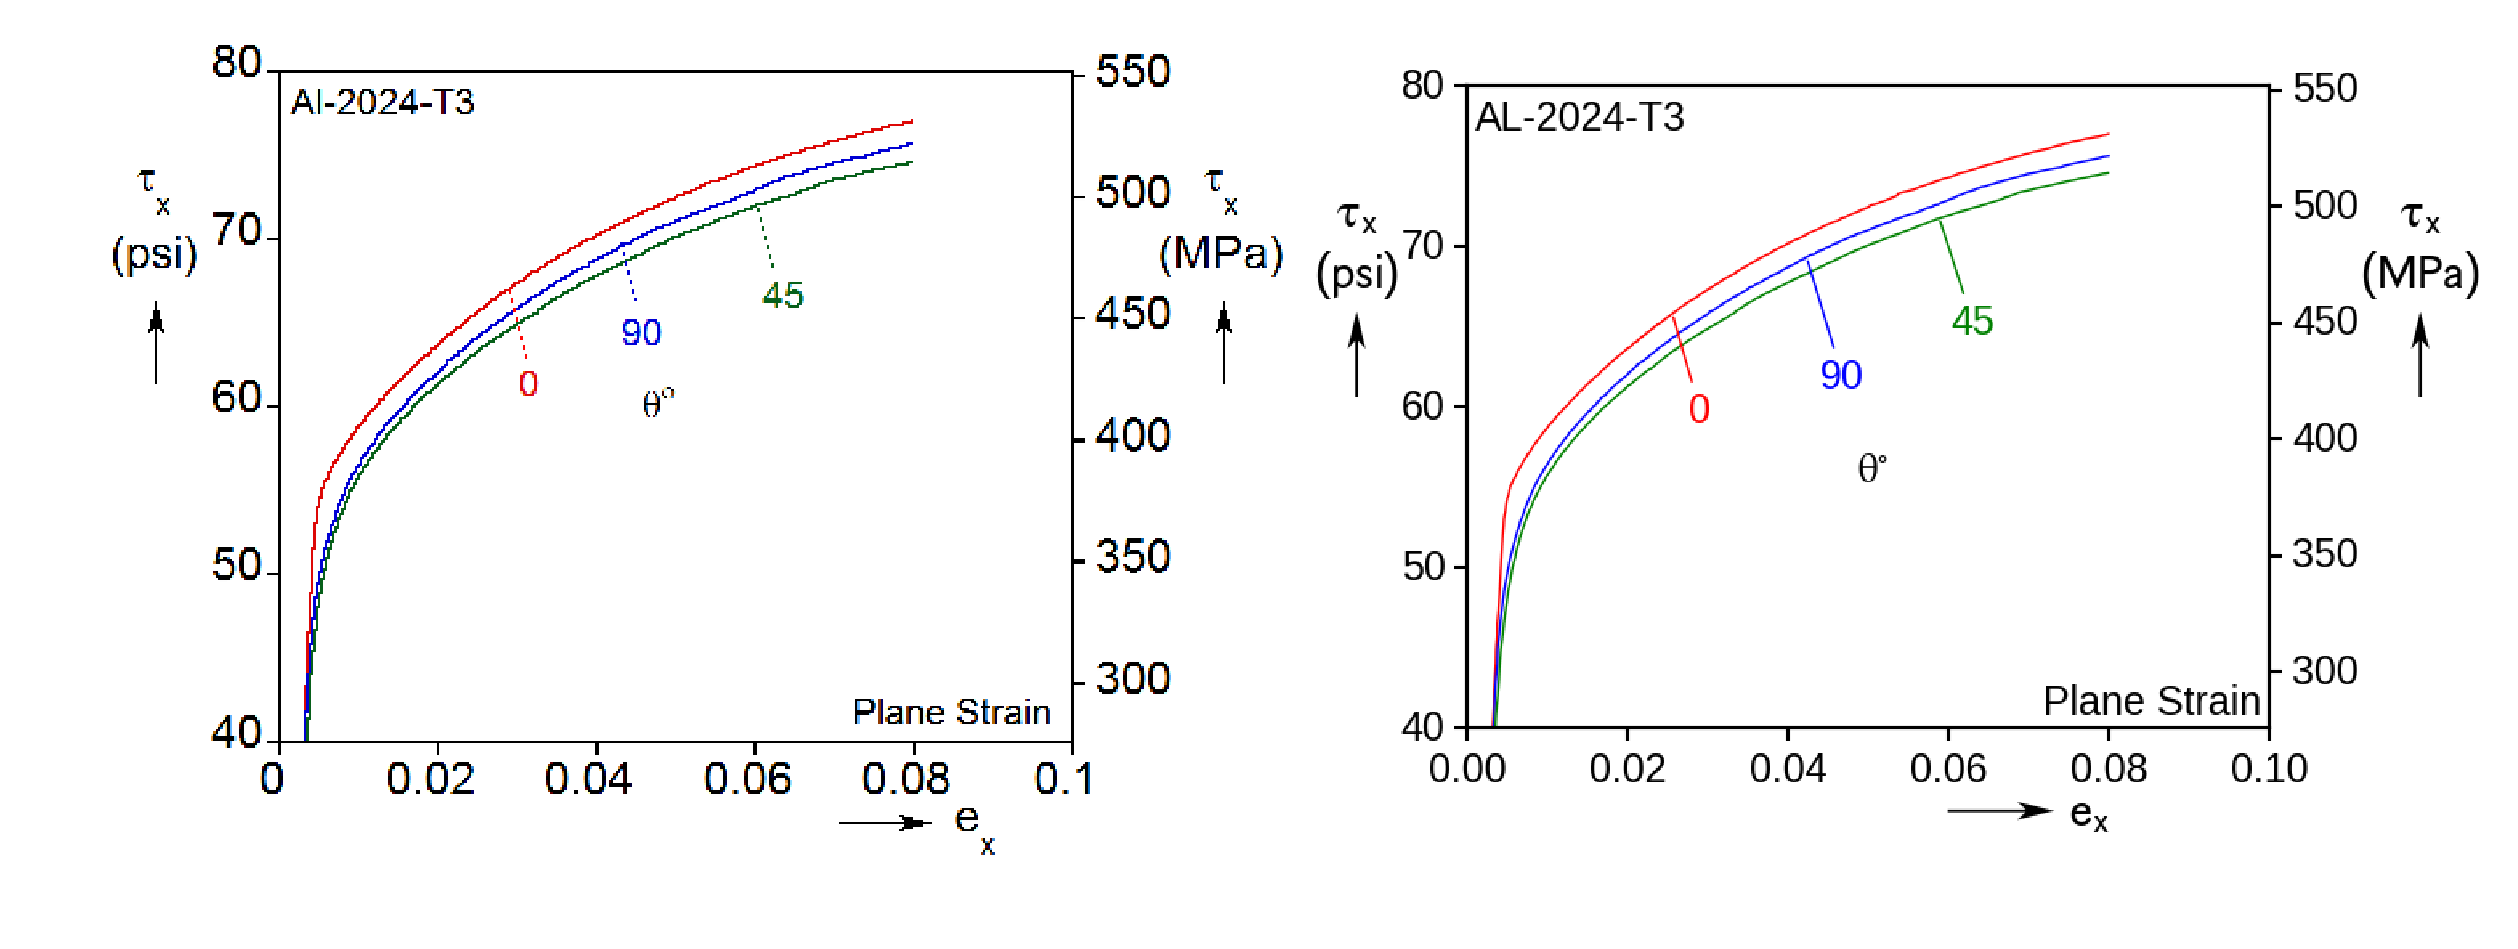

In [13]:
fig = p.figure(figsize=(16,8))
ax1 = fig.add_axes([0,0,.5,1])
goal = p.imread('TutorialDocs/Goal.png')
ax1.imshow(goal)
ax1.axis('image')
ax1.axis('off')
ax2 = fig.add_axes([.5,0,.5,1])
ours = p.imread('TutorialDocs/OurFig.png')
ax2.imshow(ours)
ax2.axis('image')
ax2.axis('off');
p.savefig('TutorialDocs/BothFigs.png',dpi=150, bbox_inches='tight')
p.close()
Image(filename='TutorialDocs/BothFigs.png', width=1000)

### Just ignore all this stuff below. I needed to do this to get the annotation locations and revert to the inline backend.

In [ ]:
%matplotlib 
L = p.plot(d0[:,0],d0[:,1],d45[:,0],d45[:,1],d90[:,0],d90[:,1])
locs = n.asarray(p.ginput(7))
n.savetxt('Locs.dat',X=locs,delimiter=',')

%matplotlib inline
p.style.use('mysty')
p.rcParams['axes.prop_cycle'] = cycler('color',['r','b','g'])
p.rcParams['lines.linewidth'] = 1